# Training의 라벨링 데이터

In [2]:
import pandas as pd
import json
import os 
import glob

In [ ]:
train_data = pd.DataFrame()
PATH = '../Data/Training/02.라벨링데이터'
folder_names = os.listdir('../Data/Training/02.라벨링데이터/')
for folder in folder_names:
    for jsonfile in glob.glob(os.path.join(PATH,folder,'*.json')):
        with open(jsonfile,'r') as f:
            data = json.load(f)
            if data['patient']['diagnosis'] >= 5: 
                records = {
                    'Filename': data['filename'],
                    'ImagePath': data['imagePath'],
                    'Class': data['patient']['diagnosis'],
                    'Point': None,
                    'Caption': data['caption']
                }
            else:
                records = {
                    'Filename': data['filename'],
                    'ImagePath': data['imagePath'],
                    'Class': data['patient']['diagnosis'],
                    'Point': data['shapes'][0]['points'],
                    'Caption': data['caption']
                }
            train_data = pd.concat([train_data, pd.DataFrame([records])], ignore_index=True)

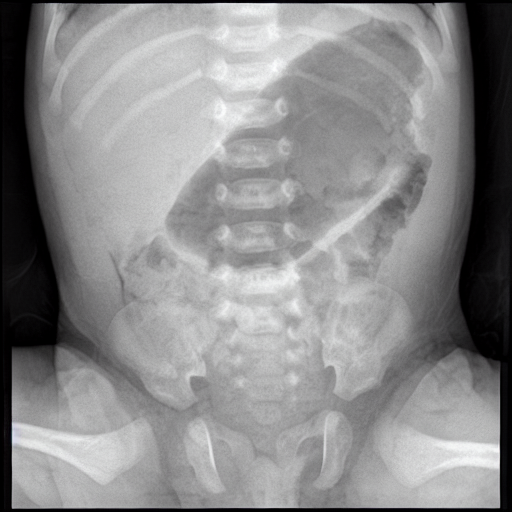

In [ ]:
train_data['ImagePath'] = train_data['ImagePath'].apply(lambda x: "TS_"+x.replace('/','_'))

In [3]:
import joblib
joblib.dump(train_data,'Train_Data.pkl')

NameError: name 'train_data' is not defined

# 평가 데이터 라벨링데이터

- 비고: 3 ~ 7세로 Random Age로 할당했다.


In [3]:
validation_data = pd.DataFrame()
PATH = '../Data/Validation/02.라벨링데이터'
folder_names = os.listdir('../Data/Validation/02.라벨링데이터/')
for folder in folder_names:
    for jsonfile in glob.glob(os.path.join(PATH,folder,'*.json')):
        with open(jsonfile,'r') as f:
            data = json.load(f)
            if data['patient']['diagnosis'] >= 5: 
                records = {
                    'Filename': data['filename'],
                    'ImagePath': data['imagePath'],
                    'Class': data['patient']['diagnosis'],
                    'Caption': data['caption'],
                    'ImageWidth': data['imageWidth'],
                    'ImageHeight': data['imageHeight'],
                    'Age': data['patient']['age']
                }
            else:
                records = {
                    'Filename': data['filename'],
                    'ImagePath': data['imagePath'],
                    'Class': data['patient']['diagnosis'],
                    'Caption': data['caption'],
                    'ImageWidth': data['imageWidth'],
                    'ImageHeight': data['imageHeight'],
                    'Age': data['patient']['age']
                }
            validation_data = pd.concat([validation_data, pd.DataFrame([records])], ignore_index=True)
validation_data

,Filename,ImagePath,Class,Caption,ImageWidth,ImageHeight,Age
0,1_1814.png,1.질환/1.선천성유문협착증,1,This plain abdominal supine radiograph shows m...,512,512,None
1,1_1815.png,1.질환/1.선천성유문협착증,1,This supine plain abdominal radiograph shows m...,512,512,None
2,1_1816.png,1.질환/1.선천성유문협착증,1,This plain abdominal supine radiograph of an a...,512,512,None
3,1_1817.png,1.질환/1.선천성유문협착증,1,This plain supine abdominal radiograph of an a...,512,512,None
4,1_1818.png,1.질환/1.선천성유문협착증,1,This plain supine abdominal radiograph shows m...,512,512,None
...,...,...,...,...,...,...,...
995,5_1955.png,2.정상,5,This plain abdominal radiograph shows a non-sp...,512,512,None
996,5_1956.png,2.정상,5,This plain abdominal radiograph shows an unrem...,512,512,None
997,5_1957.png,2.정상,5,This plain abdominal radiograph shows no remar...,512,512,None
998,5_1958.png,2.정상,5,This plain abdominal radiograph reveals no pat...,512,512,None


In [4]:
import random
validation_data['ImagePath'] = validation_data['ImagePath'].apply(lambda x: "VS_"+x.replace('/','_'))
validation_data['Age'] = validation_data['Age'].apply(lambda x: random.randint(3,7))
validation_data

,Filename,ImagePath,Class,Caption,ImageWidth,ImageHeight,Age
0,1_1814.png,VS_1.질환_1.선천성유문협착증,1,This plain abdominal supine radiograph shows m...,512,512,5
1,1_1815.png,VS_1.질환_1.선천성유문협착증,1,This supine plain abdominal radiograph shows m...,512,512,6
2,1_1816.png,VS_1.질환_1.선천성유문협착증,1,This plain abdominal supine radiograph of an a...,512,512,6
3,1_1817.png,VS_1.질환_1.선천성유문협착증,1,This plain supine abdominal radiograph of an a...,512,512,7
4,1_1818.png,VS_1.질환_1.선천성유문협착증,1,This plain supine abdominal radiograph shows m...,512,512,3
...,...,...,...,...,...,...,...
995,5_1955.png,VS_2.정상,5,This plain abdominal radiograph shows a non-sp...,512,512,4
996,5_1956.png,VS_2.정상,5,This plain abdominal radiograph shows an unrem...,512,512,6
997,5_1957.png,VS_2.정상,5,This plain abdominal radiograph shows no remar...,512,512,7
998,5_1958.png,VS_2.정상,5,This plain abdominal radiograph reveals no pat...,512,512,4


In [5]:
import os
validation_data['ImageFile'] = validation_data.apply(
    lambda row: os.path.join('../Data/Validation/01.원천데이터', row['ImagePath'], row['Filename']),
    axis=1
)
validation_data.iloc[0]['ImageFile']

'../Data/Validation/01.원천데이터\\VS_1.질환_1.선천성유문협착증\\1_1814.png'

In [6]:
validation_data.drop(columns=['Filename','ImagePath'],inplace=True)

In [7]:
validation_data

,Class,Caption,ImageWidth,ImageHeight,Age,ImageFile
0,1,This plain abdominal supine radiograph shows m...,512,512,5,../Data/Validation/01.원천데이터\VS_1.질환_1.선천성유문협착증...
1,1,This supine plain abdominal radiograph shows m...,512,512,6,../Data/Validation/01.원천데이터\VS_1.질환_1.선천성유문협착증...
2,1,This plain abdominal supine radiograph of an a...,512,512,6,../Data/Validation/01.원천데이터\VS_1.질환_1.선천성유문협착증...
3,1,This plain supine abdominal radiograph of an a...,512,512,7,../Data/Validation/01.원천데이터\VS_1.질환_1.선천성유문협착증...
4,1,This plain supine abdominal radiograph shows m...,512,512,3,../Data/Validation/01.원천데이터\VS_1.질환_1.선천성유문협착증...
...,...,...,...,...,...,...
995,5,This plain abdominal radiograph shows a non-sp...,512,512,4,../Data/Validation/01.원천데이터\VS_2.정상\5_1955.png
996,5,This plain abdominal radiograph shows an unrem...,512,512,6,../Data/Validation/01.원천데이터\VS_2.정상\5_1956.png
997,5,This plain abdominal radiograph shows no remar...,512,512,7,../Data/Validation/01.원천데이터\VS_2.정상\5_1957.png
998,5,This plain abdominal radiograph reveals no pat...,512,512,4,../Data/Validation/01.원천데이터\VS_2.정상\5_1958.png


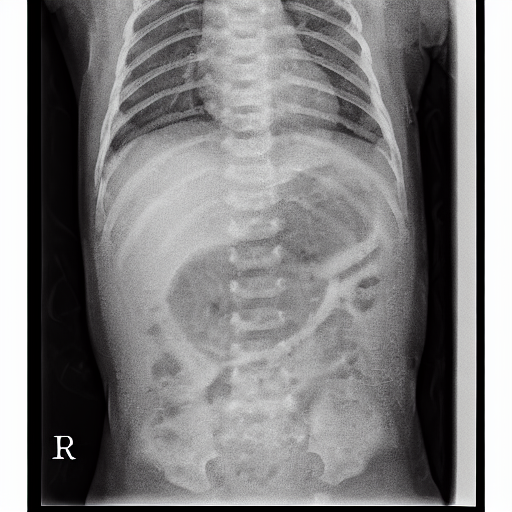

In [8]:
validation_data['ImageFile'] = validation_data['ImageFile'].apply(lambda x: x.replace("\\","/"))
import PIL.Image
PIL.Image.open(validation_data.iloc[0]['ImageFile'])

In [11]:
import joblib
import random
import pandas as pd
# 예시 데이터프레임 (당신의 실제 df를 사용하세요)
# df = pd.read_csv('your_data.csv')

# 성씨 리스트 (자주 쓰이는 10개)
last_names = ['김', '이', '박', '최', '정', '강', '조', '윤', '장', '임']

# 이름 글자 리스트 (두 글자 이름용)
first_name_syllables = ['민', '서', '지', '윤', '하', '준', '도', '현', '우', '수', '경', '선', '영', '호', '태', '재', '성', '호', '민', '진']

def generate_korean_name():
    last = random.choice(last_names)
    first = random.choice(first_name_syllables) + random.choice(first_name_syllables)
    return last + first

# 1000개 고유 이름 생성
unique_names = set()
while len(unique_names) < len(validation_data):
    unique_names.add(generate_korean_name())

unique_names = list(unique_names)
random.shuffle(unique_names)

# PatientName 컬럼으로 추가
validation_data['PatientName'] = unique_names

# 결과 확인
validation_data.head()
joblib.dump(validation_data,'Validation_Data.pkl')

['Validation_Data.pkl']

In [12]:
validation_data.head()

,Class,Caption,ImageWidth,ImageHeight,Age,ImageFile,PatientName
0,1,This plain abdominal supine radiograph shows m...,512,512,5,../Data/Validation/01.원천데이터/VS_1.질환_1.선천성유문협착증...,이태민
1,1,This supine plain abdominal radiograph shows m...,512,512,6,../Data/Validation/01.원천데이터/VS_1.질환_1.선천성유문협착증...,강호수
2,1,This plain abdominal supine radiograph of an a...,512,512,6,../Data/Validation/01.원천데이터/VS_1.질환_1.선천성유문협착증...,강호민
3,1,This plain supine abdominal radiograph of an a...,512,512,7,../Data/Validation/01.원천데이터/VS_1.질환_1.선천성유문협착증...,최경태
4,1,This plain supine abdominal radiograph shows m...,512,512,3,../Data/Validation/01.원천데이터/VS_1.질환_1.선천성유문협착증...,임도선
